In [46]:
# imports
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# initialize which columns to leave
# TODO: leave "columns_to_leave" variable
brisbane_2019 = pd.read_csv('../../data/cleaned/Brisbane/brisbane_2019.csv')
columns_to_leave = [col for col in brisbane_2019.columns]

In [48]:
# read csv
# TODO: for loop with dictionary in format {name: dataframe}
sydney_2019 = pd.read_csv('../../data/raw/Sydney/sydney_2019.csv')

/var/folders/q7/0s4jjvb94hb_2_90j2545plw0000gn/T/ipykernel_7213/942249549.py:2: DtypeWarning: Columns (18,28,44,48,49,52,53) have mixed types. Specify dtype option on import or set low_memory=False.
  sydney_2019 = pd.read_csv('../../data/raw/Sydney/sydney_2019.csv')


In [49]:
# initialize all columns
# TODO: leave "all_columns" variable
all_columns = [col for col in sydney_2019.columns]

In [56]:
# initialize columns to drop
# TODO: leave "columns to drop" variable
columns_to_drop_set = set(all_columns) - set(columns_to_leave)
columns_to_drop = list(columns_to_drop_set)+['author', 'body', 'author_created_utc', 'body']

['score', 'edited_on', 'updated_utc', 'controversiality', 'no_follow', 'locked', 'id', 'author_cakeday', 'collapsed_reason', 'author_flair_background_color', 'distinguished', 'author_flair_type', 'link_id', 'body_sha1', 'send_replies', 'stickied', 'archived', 'subreddit_name_prefixed', 'collapsed_because_crowd_control', 'author_flair_css_class', 'author_flair_richtext', 'author_flair_template_id', 'is_submitter', 'subreddit_id', 'total_awards_received', 'can_gild', 'author_fullname', 'author_flair_text_color', 'all_awardings', 'collapsed', 'retrieved_utc', 'can_mod_post', 'removal_reason', 'gildings', 'treatment_tags', 'author_premium', 'permalink', 'subreddit_type', 'edited', 'author_flair_text', 'quarantined', 'gilded', 'author_patreon_flair', 'steward_reports', 'created_utc', 'associated_award', 'awarders', 'nest_level', 'parent_id', 'author', 'body', 'author_created_utc', 'body']


In [51]:
# define function to drop columns
# TODO: add function to final function
def drop_columns(dataframe):
    global columns_to_drop
    return dataframe.drop(columns_to_drop, axis=1)

In [57]:
# apply function to one dataframe
# TODO: remove the cell
sydney_2019 = drop_columns(sydney_2019)

In [58]:
# define function to remove time
# TODO: add function to final function
def remove_time(dataframe):
    dataframe['utc_datetime_str'] = pd.to_datetime(dataframe['utc_datetime_str'])
    dataframe['utc_datetime_str'] = dataframe['utc_datetime_str'].dt.date
    return dataframe

In [59]:
# apply function to dataframe
# TODO: remove the cell
sydney_2019 = remove_time(sydney_2019)

In [60]:
# TODO: add line to final function
sydney_2019.sort_values(by='utc_datetime_str', inplace=True)

In [61]:
# TODO: write as a function and add to final function
test_df = sydney_2019[['utc_datetime_str', 'Analytic']]

test_df.set_index('utc_datetime_str', inplace=True) # set 'date' column as the index
test_df.index = pd.to_datetime(test_df.index) # convert index to datetime index

# resample by 2 weeks and calculate mean
result = test_df.resample('2W').mean()

# create new column for week number
result['week_number'] = result.index.week // 2 + 1
result = result[['week_number', 'Analytic']] # reorder columns
result.head(27)

/var/folders/q7/0s4jjvb94hb_2_90j2545plw0000gn/T/ipykernel_7213/699739393.py:10: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  result['week_number'] = result.index.week // 2 + 1


,week_number,Analytic
utc_datetime_str,,
2019-01-06,1,55.103268
2019-01-20,2,54.427522
2019-02-03,3,54.924476
2019-02-17,4,55.759975
2019-03-03,5,55.386078
2019-03-17,6,54.167660
2019-03-31,7,51.826765
2019-04-14,8,52.721964
2019-04-28,9,53.034314


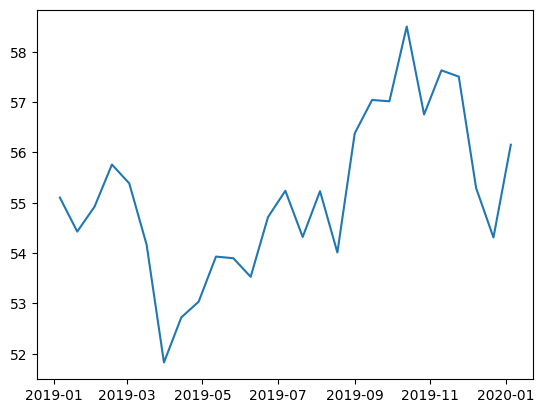

In [35]:
# TODO: move to another directory
plt.plot(result['Analytic'], linestyle='solid')

In [ ]:
# TODO: write a complete function that makes all the cleaning operations with the data
# TODO: and store dataframes files as reddits-visualization/data/cleaned/CITY_YEAR.csv